In [1]:
import xarray as xr

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt



# entire ATL
#fileName = 'tang_ASO_atl_0_90.nc'
#output1 = "tang_scatter_ASO_atl_0_90.png"
#output2 = "beta_ASO_atl_0_90.png"

# 20-40N
fileName = 'tang_ASO_atl_20_40.nc'
output1 = "tang_scatter_ASO_atl_20_40.png"
output2 = "beta_ASO_atl_20_40.png"


ds = xr.open_dataset(fileName)
print(ds)


<xarray.Dataset>
Dimensions:            (ncl0: 1, ncl1: 1, ncl10: 31021, ncl2: 1, ncl3: 1, ncl4: 31021, ncl5: 31021, ncl6: 31021, ncl7: 54, ncl8: 54, ncl9: 54)
Dimensions without coordinates: ncl0, ncl1, ncl10, ncl2, ncl3, ncl4, ncl5, ncl6, ncl7, ncl8, ncl9
Data variables:
    startYear          (ncl0) int32 ...
    endYear            (ncl1) int32 ...
    latS               (ncl2) float32 ...
    latN               (ncl3) float32 ...
    acceldate          (ncl4) float64 ...
    accelYear          (ncl5) float32 ...
    accelData          (ncl6) float32 ...
    years              (ncl7) float32 ...
    accelYearlyAvePos  (ncl8) float64 ...
    accelYearlyAveNeg  (ncl9) float64 ...
    accelFracyear      (ncl10) float32 ...


In [2]:
#accel = ds.accelYearlyAvePos
#years = ds.years

accel = ds.accelData
years = ds.accelFracyear

#print(accel.head())
#print(years.head())

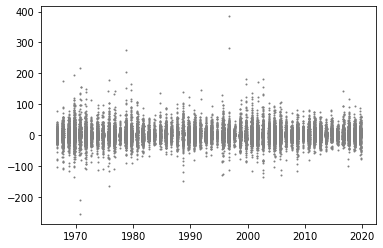

In [3]:
#plt.plot(years, accel, color='grey',markersize=1)
plt.plot(years, accel, 'o', color='grey',markersize=1)


In [4]:
#data = np.vstack((years,accel)).T
#print(data)

df = pd.DataFrame({'years':years, 'accel':accel})
print(df)


             years      accel
0      1966.635620   2.896194
1      1966.635986   5.204904
2      1966.636353   6.831342
3      1966.636597   2.787852
4      1966.636963  -1.582180
...            ...        ...
31016  2019.831177 -25.704464
31017  2019.831543  -3.529833
31018  2019.831909   1.086253
31019  2019.832153   9.301884
31020  2019.832520  11.169550

[31021 rows x 2 columns]


In [5]:
model = sm.OLS(accel.values,years.values)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              357.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                    3.32e-79
Time:                        16:42:58   Log-Likelihood:                     -1.3607e+05
No. Observations:               31021   AIC:                                  2.722e+05
Df Residuals:                   31020   BIC:                                  2.722e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [6]:

mod = smf.quantreg('accel ~ years', df)
res = mod.fit(q=.5)
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                  accel   Pseudo R-squared:            0.0004531
Model:                       QuantReg   Bandwidth:                       1.847
Method:                 Least Squares   Sparsity:                        20.35
Date:                Thu, 12 Nov 2020   No. Observations:                31021
Time:                        16:42:59   Df Residuals:                    31019
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.4301      7.083     -6.132      0.000     -57.312     -29.548
years          0.0221      0.004      6.216      0.000       0.015       0.029

The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.


In [7]:
#quantiles = np.arange(.05,.96, .05)


quantiles = [0.05,.10,.15,.3,.5,.7,.85,.9,.95]
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['years']] + \
            res.conf_int().loc['years'].tolist()

models = [fit_model(x1) for x1 in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])


ols = smf.ols('accel ~ years', df).fit()
ols_ci = ols.conf_int().loc['years'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['years'],
           lb = ols_ci[0],
           ub = ols_ci[1])


models.b = models.b

print(models)
print(ols)




      q           a         b        lb        ub
0  0.05 -300.476253  0.138247  0.100556  0.175937
1  0.10 -162.890847  0.073350  0.050324  0.096376
2  0.15  -86.428766  0.037244  0.017876  0.056612
3  0.30  -16.441458  0.005840 -0.006347  0.018026
4  0.50  -43.430071  0.022081  0.015118  0.029043
5  0.70  -25.748872  0.016489  0.005341  0.027637
6  0.85   40.602984 -0.012363 -0.033300  0.008573
7  0.90  105.996422 -0.042289 -0.069749 -0.014830
8  0.95  325.310913 -0.146819 -0.189167 -0.104472
{'a': -17.261663953203012, 'b': 0.00970303581429522, 'lb': -0.0036010194798270882, 'ub': 0.02300709110841753}


[1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


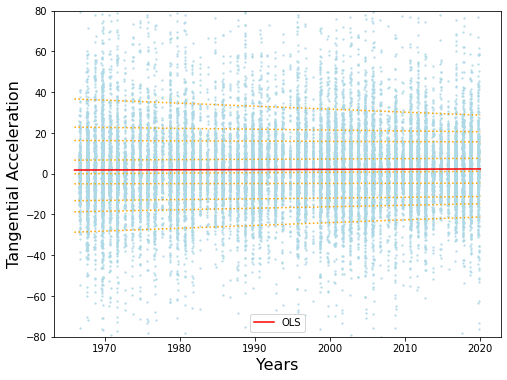

In [8]:
#x = np.arange(df.years.min(), df.years.max(), 50)

x = np.arange(1966,2021,1)

print(x)

get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='orange')

y = get_y(ols['a'], ols['b'])


colors = np.random.rand(1502)
ax.scatter(df.years, df.accel, s=2, color='lightblue',alpha=.7)
ax.plot(x, y, color='red', label='OLS')

#ax.set_xlim((240, 3000))
ax.set_ylim((-80, 80))
legend = ax.legend()
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel('Tangential Acceleration', fontsize=16);
plt.savefig(output1)


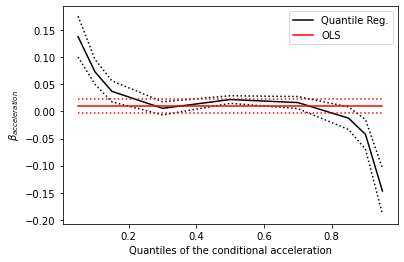

In [10]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{acceleration}$')
plt.xlabel('Quantiles of the conditional acceleration')
plt.legend()
#plt.show()
plt.savefig("beta_ASO_atl_0_90.png")
